In [1]:
import numpy as np
import pandas as pd

In [11]:
data = {
    'Processes': ['P1','P2','P3','P4','P5'],
    'Arrival Time': np.array([0,1,2,3,4]),
    'Burst Time': np.array([5,36,10,8,29]),
    'Completion Time': np.ones(5,dtype=int),
    'Turn Around Time':np.ones(5,dtype=int),
    'Waiting Time':np.ones(5,dtype=int)
}

df = pd.DataFrame(data)


# Calculating completion time

add = 0
c = 0
for time in df['Burst Time']:
    add += time
    df['Completion Time'][c] = add
    c+=1
    
df['Turn Around Time'] = df['Completion Time'] - df['Arrival Time']
df['Waiting Time'] = df['Turn Around Time'] - df['Burst Time']

/home/ibtehaj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
df

,Processes,Arrival Time,Burst Time,Completion Time,Turn Around Time,Waiting Time
0,P1,0,5,5,5,0
1,P2,1,36,41,40,4
2,P3,2,10,51,49,39
3,P4,3,8,59,56,48
4,P5,4,29,88,84,55


In [13]:
# manipulation of original dataframe for extracting tuples to be used in plotting chart

gantt = pd.DataFrame(df[['Completion Time','Burst Time']])
x = gantt['Completion Time']
x.drop(x.tail(1).index,inplace=True) # drop last n rows
x.index = x.index + 1  
x = pd.concat([pd.Series([0]), x])
gantt['Completion Time'] = x
gantt

,Completion Time,Burst Time
0,0,5
1,5,36
2,41,10
3,51,8
4,59,29


In [7]:
# tuples for chart
tups = gantt.apply(tuple, axis=1).tolist()
tups


[(0, 5), (5, 36), (41, 10), (51, 8), (59, 29)]

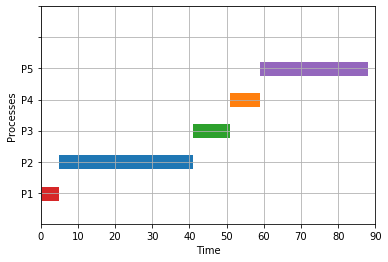

In [9]:
# Importing the matplotlb.pyplot 
import matplotlib.pyplot as plt 

# Declaring a figure "gnt" 
fig, gnt = plt.subplots() 

# Setting Y-axis limits 
gnt.set_ylim(0, 30) 

# Setting X-axis limits 
gnt.set_xlim(0, 90) 

# Setting labels for x-axis and y-axis 
gnt.set_xlabel('Time') 
gnt.set_ylabel('Processes') 

# Setting ticks on y-axis 
gnt.set_yticks(np.arange(20,150,20)) 
# Labelling tickes of y-axis 
gnt.set_yticklabels(df['Processes'].tolist()) 

# Setting graph attribute 
gnt.grid(True) 

# gnt.broken_barh([l[0]], (15, 9), facecolors =('tab:red')) 
# gnt.broken_barh([l[1]], (35, 9), facecolors =('tab:blue')) 
# gnt.broken_barh([l[2]], (55, 9), facecolors =('tab:green')) 
# gnt.broken_barh([l[3]], (75, 9), facecolors =('tab:orange')) 
# gnt.broken_barh([l[4]], (95, 9), facecolors =('tab:purple'))

gnt.broken_barh([tups[0]], (15, 9), facecolors =('tab:red')) 
gnt.broken_barh([tups[1]], (35, 9), facecolors =('tab:blue')) 
gnt.broken_barh([tups[2]], (55, 9), facecolors =('tab:green')) 
gnt.broken_barh([tups[3]], (75, 9), facecolors =('tab:orange')) 
gnt.broken_barh([tups[4]], (95, 9), facecolors =('tab:purple'))

plt.savefig("gantt1.png") 
